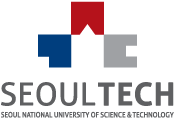

# Midterm examination
---

by Prof. Josué Obregón <br>
Data Analysis for Electronic Manufacturing <br>
Department of Data Science - SeoulTech<br>



# Instructions

You are required to work with two different datasets for this midterm examination. Load the datasets and follow the instructions provided. For each required visualization output, please write a one- or two-sentence comment explaining your findings (you may write in Korean if it is easier for you).


본 중간고사에서는 두 개의 서로 다른 데이터셋을 사용해야 합니다. 데이터셋을 불러온 후 제공된 지침에 따라 작업하세요. 각 시각화 결과에 대해, 분석 결과를 설명하는 한두 문장의 코멘트를 작성하세요. (한국어로 작성해도 무방합니다).


# Dataset 1, Steel Plate Manufacturing

You have just been hired by a steel plate manufacturing company. You have been provided with a dataset containing information on steel plate faults, classified into seven different types.

The dataset consists of 27 features describing each fault (e.g., location, size) and one feature indicating the type of fault (Class).

Your task is to perform specific data analysis, generating four visualizations and one summarization table. Each visualization will help you understand the data, and some data manipulation may be necessary before creating the visualizations.

To begin, run the first two cells to load the data.

철강 판 제조 회사에 새로 입사한 상황입니다. 철강 판의 결함을 7가지 유형으로 분류한 데이터셋을 제공받았습니다.

이 데이터셋에는 각 결함을 설명하는 27개의 특징(위치, 크기 등)과 결함 유형을 나타내는 하나의 특징(Class)이 포함되어 있습니다.

주어진 과제는 특정 데이터 분석을 수행하여 4개의 시각화와 1개의 요약 표를 생성하는 것입니다. 각 시각화는 데이터를 이해하는 데 도움이 되며, 시각화를 생성하기 전에 데이터 조작이 필요할 수 있습니다.

먼저 데이터를 불러오기 위해 첫 두 셀을 실행하세요.

In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd
import seaborn as sns

In [2]:
raw_data = fetch_openml(data_id=40982, as_frame=True, parser='pandas')
data = raw_data['frame']
data.columns = ['X_Minimum', 'X_Maximum', 'Y_Minimum','Y_Maximum','Pixels_Areas','X_Perimeter','Y_Perimeter','Sum_of_Luminosity','Minimum_of_Luminosity','Maximum_of_Luminosity','Length_of_Conveyer',
                'TypeOfSteel_A300','TypeOfSteel_A400','Steel_Plate_Thickness','Edges_Index','Empty_Index','Square_Index','Outside_X_Index','Edges_X_Index','Edges_Y_Index','Outside_Global_Index',
                'LogOfAreas','Log_X_Index','Log_Y_Index','Orientation_Index','Luminosity_Index','SigmoidOfAreas','Class']

## 1. Number of defect types and most common defect type (10 points)

The first step is to understand the response variable, which in this case is the fault type. Generate a visualization that shows the distribution of different fault types, helping you understand the number of fault types present and identifying the most common ones.

 Note: Remember to check for any null values in the data first. You may decide how to handle them, but be sure to justify your decision.
 You may also use relevant Pandas functions to assist in understanding your data.


첫 번째 단계는 응답 변수, 즉 결함 유형을 이해하는 것입니다. 결함 유형의 분포를 시각화하여 결함 유형의 수와 가장 흔한 결함이 무엇인지 파악하세요.

참고사항:

  먼저 데이터의 결측값(null values)을 확인하세요. 이를 어떻게 처리할지는 스스로 결정하되, 그 이유를 반드시 설명하세요.
  데이터를 이해하는 데 도움이 될 수 있는 Pandas 함수도 활용할 수 있습니다.

In [7]:
data.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Class
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   X_Minimum              1941 non-null   int64   
 1   X_Maximum              1941 non-null   int64   
 2   Y_Minimum              1941 non-null   int64   
 3   Y_Maximum              1941 non-null   int64   
 4   Pixels_Areas           1941 non-null   int64   
 5   X_Perimeter            1941 non-null   int64   
 6   Y_Perimeter            1941 non-null   int64   
 7   Sum_of_Luminosity      1941 non-null   int64   
 8   Minimum_of_Luminosity  1941 non-null   int64   
 9   Maximum_of_Luminosity  1941 non-null   int64   
 10  Length_of_Conveyer     1941 non-null   int64   
 11  TypeOfSteel_A300       1941 non-null   int64   
 12  TypeOfSteel_A400       1941 non-null   int64   
 13  Steel_Plate_Thickness  1941 non-null   int64   
 14  Edges_Index            1941 non-null   f

In [13]:
data['Class'].unique()

['Pastry', 'Z_Scratch', 'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
Categories (7, object): ['Bumps', 'Dirtiness', 'K_Scratch', 'Other_Faults', 'Pastry', 'Stains',
                         'Z_Scratch']

In [14]:
data.isnull().sum()

,0
X_Minimum,0
X_Maximum,0
Y_Minimum,0
Y_Maximum,0
Pixels_Areas,0
X_Perimeter,0
Y_Perimeter,0
Sum_of_Luminosity,0
Minimum_of_Luminosity,0
Maximum_of_Luminosity,0


이 데이터에는 결측값이 존재하지 않습니다. 그래서 다른 처리가 필요하지 않습니다.

<Axes: xlabel='Class', ylabel='count'>

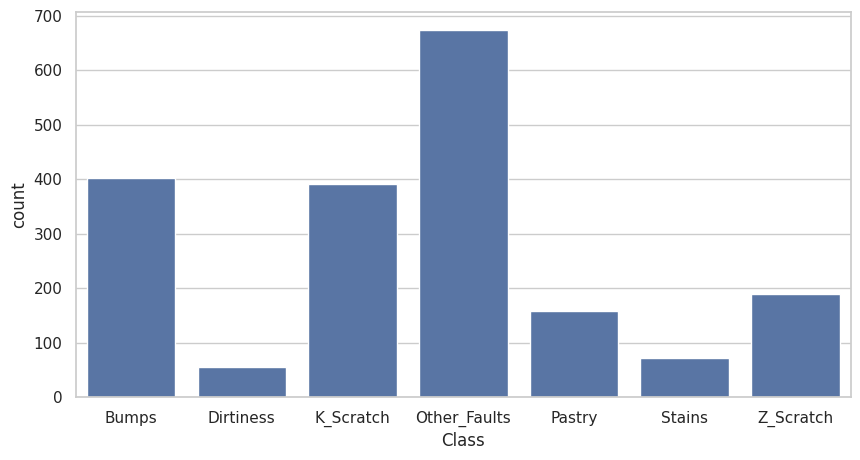

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.countplot(data, x = 'Class')

결함 유형은 총 7가지이며 가장 많은 유형은 'Other_Faults'입니다.

## 2. Understand the correlation of features (10 points)

The next step is to determine if there are highly correlated features. Create a suitable visualization to display the correlation among all features in the dataset.

Afterward, write a comment on two correlations that stand out to you (with values close to -1 or 1).

다음 단계는 높은 상관 관계를 가진 특징이 있는지 확인하는 것입니다. 데이터 내 모든 특징 간의 상관 관계를 시각화할 수 있는 적절한 시각화를 생성하세요.

이후, -1 또는 1에 가까운 값 중 주목할 만한 두 가지 상관 관계에 대해 코멘트를 작성하세요.

In [21]:
data1 = data.drop('Class', axis=1)

In [22]:
data1

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,0.0206,0.5185,0.7273,0.0,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254
1937,144,175,340581,340598,287,44,24,34599,112,133,...,0.0228,0.7046,0.7083,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173
1938,145,174,386779,386794,292,40,22,37572,120,140,...,0.0213,0.7250,0.6818,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079
1939,137,170,422497,422528,419,97,47,52715,117,140,...,0.0243,0.3402,0.6596,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919


In [23]:
corr_matrix = data1.corr()
corr_matrix

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
X_Minimum,1.000000,0.988314,0.041821,0.041807,-0.307322,-0.258937,-0.118757,-0.339045,0.237637,-0.075554,...,-0.361160,0.154778,0.367907,0.147282,-0.428553,-0.437944,-0.326851,0.178585,-0.031578,-0.355251
X_Maximum,0.988314,1.000000,0.052147,0.052135,-0.225399,-0.186326,-0.090138,-0.247052,0.168649,-0.062392,...,-0.214930,0.149259,0.271915,0.099253,-0.332169,-0.324012,-0.265990,0.115019,-0.038996,-0.286736
Y_Minimum,0.041821,0.052147,1.000000,1.000000,0.017670,0.023843,0.024150,0.007362,-0.065703,-0.067785,...,0.054165,0.066085,-0.036543,-0.062911,0.044952,0.070406,-0.008442,-0.086497,-0.090654,0.025257
Y_Maximum,0.041807,0.052135,1.000000,1.000000,0.017840,0.024038,0.024380,0.007499,-0.065733,-0.067776,...,0.054185,0.066051,-0.036549,-0.062901,0.044994,0.070432,-0.008382,-0.086480,-0.090666,0.025284
Pixels_Areas,-0.307322,-0.225399,0.017670,0.017840,1.000000,0.966644,0.827199,0.978952,-0.497204,0.110063,...,0.588606,-0.294673,-0.463571,-0.109655,0.650234,0.603072,0.578342,-0.137604,-0.043449,0.422947
X_Perimeter,-0.258937,-0.186326,0.023843,0.024038,0.966644,1.000000,0.912436,0.912956,-0.400427,0.111363,...,0.517098,-0.293039,-0.412100,-0.079106,0.563036,0.524716,0.523472,-0.101731,-0.032617,0.380605
Y_Perimeter,-0.118757,-0.090138,0.024150,0.024380,0.827199,0.912436,1.000000,0.704876,-0.213758,0.061809,...,0.209160,-0.195162,-0.136723,0.013438,0.294040,0.228485,0.344378,0.031381,-0.047778,0.191772
Sum_of_Luminosity,-0.339045,-0.247052,0.007362,0.007499,0.978952,0.912956,0.704876,1.000000,-0.540566,0.136515,...,0.658339,-0.327728,-0.529745,-0.121090,0.712128,0.667736,0.618795,-0.158483,-0.014067,0.464248
Minimum_of_Luminosity,0.237637,0.168649,-0.065703,-0.065733,-0.497204,-0.400427,-0.213758,-0.540566,1.000000,0.429605,...,-0.487574,0.252256,0.316610,0.035462,-0.678762,-0.567655,-0.588208,0.057123,0.669534,-0.514797
Maximum_of_Luminosity,-0.075554,-0.062392,-0.067785,-0.067776,0.110063,0.111363,0.061809,0.136515,0.429605,1.000000,...,0.099300,0.093522,-0.167441,-0.124039,0.007672,0.092823,-0.069522,-0.169747,0.870160,-0.039651


<Axes: >

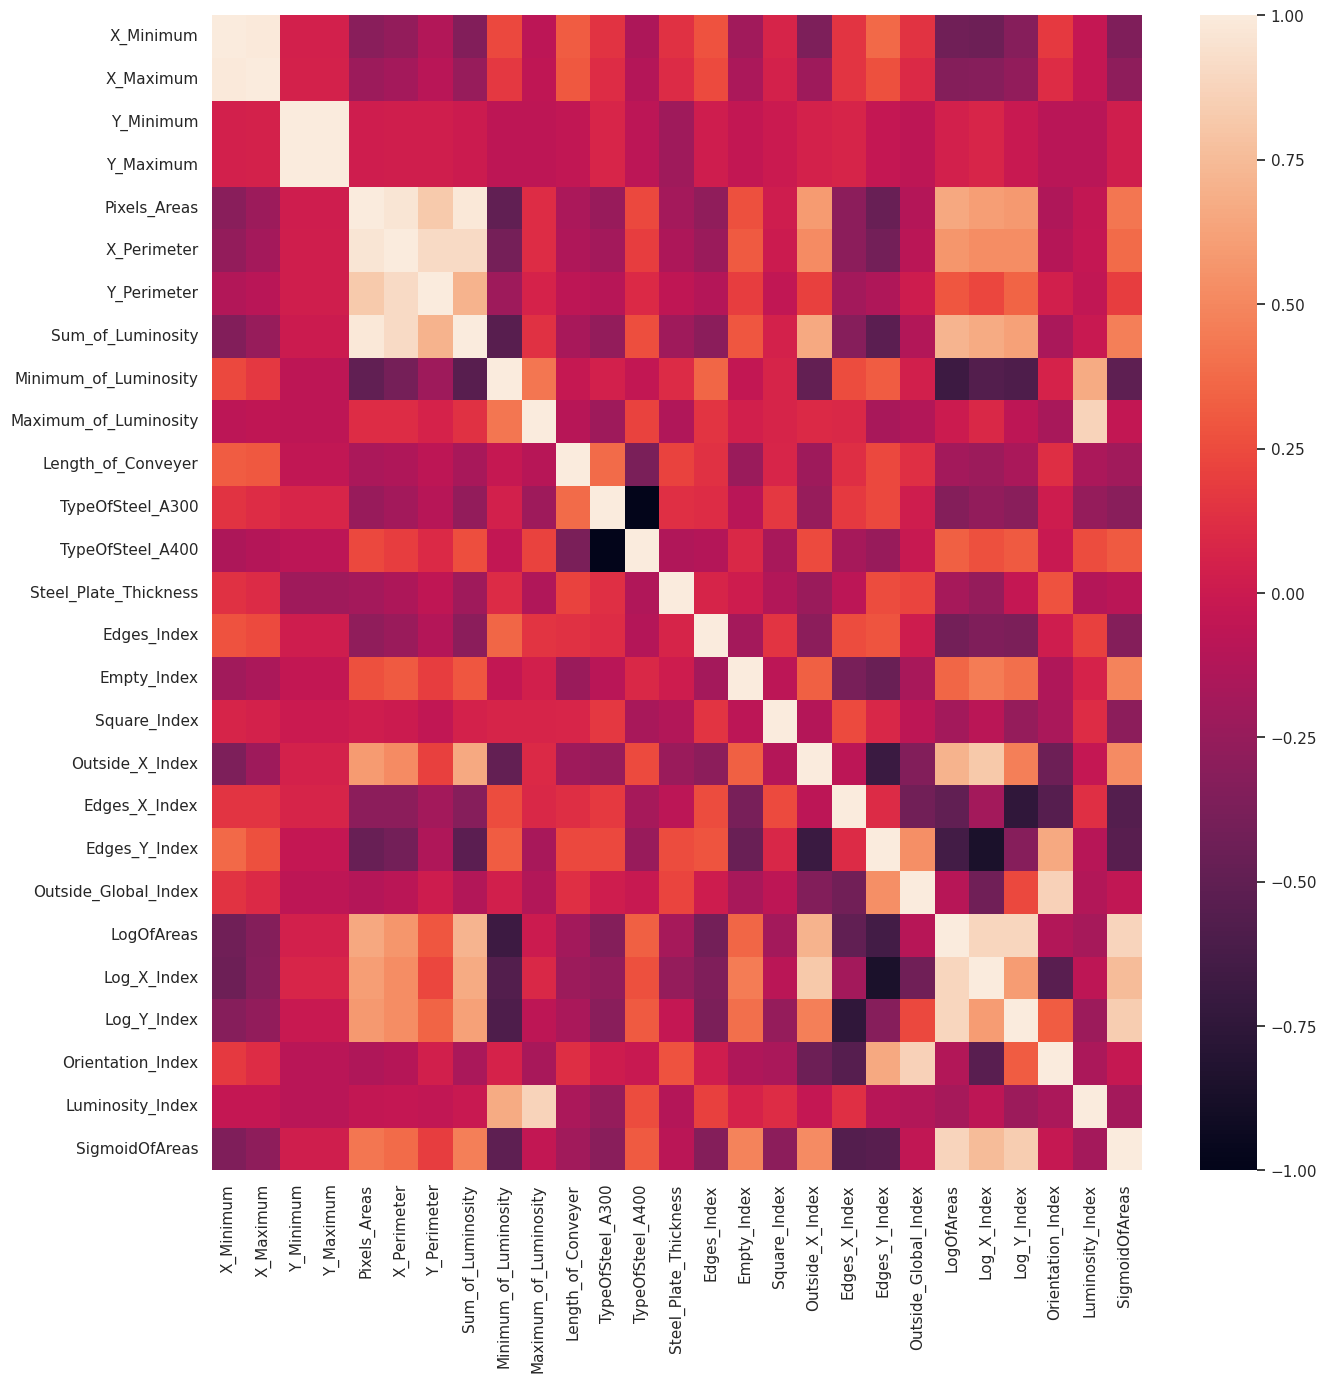

In [28]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix)

Edges_X_Index와 Log_Y_Index가 그래프에서 검정색으로 보이기 때문에 상관관계가 -1과 가깝다는 것을 알 수 있다. 이때 실제 corr_matrix에서 확인되는 값은 -0.748892이다.
또한 Edges_Y_Index와 Log_X_Index도 히트맵에서 검정색을 띄기 때문에 -1과 가깝다는 것을 알 수 있고, 실제 corr_matrix에서 확인한 값은 -0.855414이다.


# 3. Empty_Index feature (10 points)

Generate a visualization that helps you understand the distribution of the **Empty_Index** feature across different fault types.

**Empty_Index** 특징의 데이터 분포를 결함 유형별로 파악할 수 있는 시각화를 생성하세요.

In [30]:
data[['Empty_Index', 'Class']]

,Empty_Index,Class
0,0.2415,Pastry
1,0.3793,Pastry
2,0.3426,Pastry
3,0.4413,Pastry
4,0.4486,Pastry
...,...,...
1936,0.3906,Other_Faults
1937,0.4554,Other_Faults
1938,0.3287,Other_Faults
1939,0.5904,Other_Faults


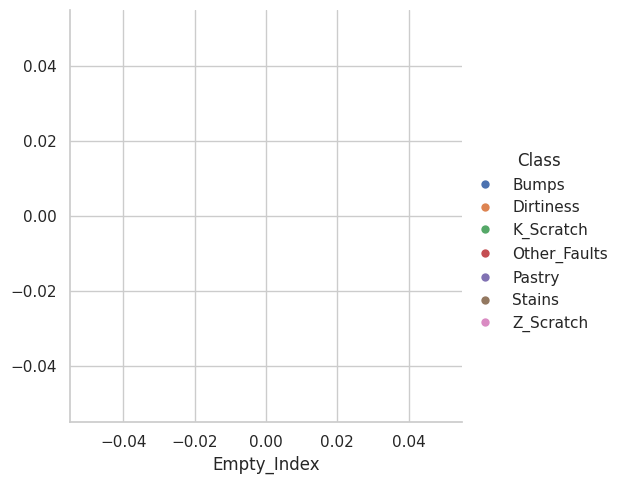

In [34]:
sns.relplot(data=data[['Empty_Index', 'Class']], x ='Empty_Index', hue='Class')

# 4. Relationship between Minimum of luminosity and Log of areas (10 points)

Create a plot to illustrate the relationship between two numerical features: **Minimum_of_Luminosity** and **LogOfAreas**. Color each data point according to the fault type (**Class**).

For this visualization, exclude records from the "**Other_Faults**" class.

두 개의 수치형 특징인 **Minimum_of_Luminosity**와 **LogOfAreas** 간의 관계를 보여주는 플롯을 생성하세요. 각 데이터 포인트는 결함 유형(**Class**)에 따라 색상을 달리 표시하세요.

이 시각화에서는 "**Other_Faults**" 클래스의 레코드는 제외하세요.

In [44]:
data

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Class
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,0.5185,0.7273,0.0,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254,Other_Faults
1937,144,175,340581,340598,287,44,24,34599,112,133,...,0.7046,0.7083,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173,Other_Faults
1938,145,174,386779,386794,292,40,22,37572,120,140,...,0.7250,0.6818,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079,Other_Faults
1939,137,170,422497,422528,419,97,47,52715,117,140,...,0.3402,0.6596,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919,Other_Faults


In [56]:
data.drop(data['Class'] == 'Other_Faults', axis=1)

KeyError: '[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True] not found in axis'

# 5. Sigmoid of Areas feature (15 points)

The last output to be evaluated for this dataset is not a visualization but a table. Complete the tasks as follows:

1. Create an indicator variable for the **sigmoid of Areas** feature, where the condition is that the value is greater than 0.5.

2. Next, create a summarization table:
   - The table’s index should be the fault types.
   - The table’s columns should be the new indicator variable created in step (1).
   - The values to aggregate are **Edges_X_Index** and **Edges_Y_Index** using the median as the aggregation function.

이 데이터셋의 마지막 출력물은 시각화가 아닌 테이블입니다. 다음 작업을 수행하세요:

1. **Sigmoid of Areas** 특징에 대해 값이 0.5보다 큰 경우를 기준으로 하는 지표 변수(indicator variable)를 생성하세요.

2. 다음 요약 테이블을 만드세요:
   - 테이블의 인덱스는 결함 유형이 되어야 합니다.
   - 테이블의 열은 1단계에서 생성한 새로운 지표 변수가 되어야 합니다.
   - 집계할 값은 **Edges_X_Index**와 **Edges_Y_Index**이며, 중앙값(median)을 집계 함수로 사용하세요.



In [62]:
data['indicator variable'] = 0

In [63]:
data

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Class,indicator variable
0,42,50,270900,270944,267,17,44,24220,76,108,...,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,0.7273,0.0,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254,Other_Faults,0
1937,144,175,340581,340598,287,44,24,34599,112,133,...,0.7083,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173,Other_Faults,0
1938,145,174,386779,386794,292,40,22,37572,120,140,...,0.6818,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079,Other_Faults,0
1939,137,170,422497,422528,419,97,47,52715,117,140,...,0.6596,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919,Other_Faults,0


In [70]:
data.loc[data['SigmoidOfAreas'] > 0.5, 'indicator variable'] = 1
pivot_table = pd.pivot_table(data, values=['Edges_X_Index', 'Edges_Y_Index'], index='Class', columns='indicator variable', aggfunc='median')
pivot_table

<ipython-input-70-7995256631ac>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(data, values=['Edges_X_Index', 'Edges_Y_Index'], index='Class', columns='indicator variable', aggfunc='median')


Edges_X_Index          Edges_Y_Index        
indicator variable             0        1             0       1
Class                                                          
Bumps                     0.7692  0.61540        1.0000  0.9247
Dirtiness                 0.4143  0.16160        1.0000  1.0000
K_Scratch                 0.9271  0.58700        1.0000  0.4615
Other_Faults              0.7576  0.49470        1.0000  0.8636
Pastry                    0.6000  0.37810        1.0000  1.0000
Stains                    1.0000      NaN        1.0000     NaN
Z_Scratch                 0.6340  0.35475        0.9487  0.9099

# Dataset 2, Multi-stage continuous-flow manufacturing process

You have just joined a manufacturing company specializing in continuous factory processes. You have been provided with a dataset that captures detailed information on various measurements from different stages of the factory’s production line.

The dataset includes 116 features, such as environmental conditions, raw material properties, machine temperatures, and output measurements across different process stages. Each row in the dataset represents a time-stamped entry, allowing for detailed temporal analysis of the factory’s operational conditions.

새로운 제조 회사에 입사하여 연속적인 공장 프로세스에 대한 데이터를 제공받았습니다. 이 데이터셋은 공장 생산 라인의 다양한 단계에서 발생하는 다양한 측정 값을 기록하고 있습니다.

데이터셋에는 환경 조건, 원자재 특성, 기계 온도 및 다양한 공정 단계의 출력 측정치 등 116개의 특징이 포함되어 있습니다. 각 행은 시간 스탬프가 포함된 항목을 나타내며, 공장의 운영 조건에 대한 상세한 시간 분석을 가능하게 합니다.


In [71]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("supergus/multistage-continuousflow-manufacturing-process")
print("Path to dataset files:", path)
dataset_path =  path+"/continuous_factory_process.csv"

100%|██████████| 1.23M/1.23M [00:00<00:00, 58.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/supergus/multistage-continuousflow-manufacturing-process/versions/2


In [72]:
data2 = pd.read_csv(dataset_path)
data2.head(5)

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
0,2019-03-06 10:52:33,17.24,23.53,11.54,200,963.0,247,1241.26,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
1,2019-03-06 10:52:34,17.24,23.53,11.54,200,963.0,247,1246.09,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
2,2019-03-06 10:52:35,17.24,23.53,11.54,200,963.0,247,1246.29,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
3,2019-03-06 10:52:36,17.24,23.53,11.54,200,963.0,247,1247.59,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
4,2019-03-06 10:52:37,17.24,23.53,11.54,200,963.0,247,1252.83,72.1,72.4,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71


## 1. Timestamp Indexing (10 points)
   Convert the `time_stamp` column to a DateTime index. Then, resample the data to obtain hourly averages for **AmbientConditions.AmbientTemperature.U.Actual**. Generate a line plot of the resampled data.

   `time_stamp` 열을 DateTime 인덱스로 변환하세요. 그런 다음 데이터를 리샘플링하여 **AmbientConditions.AmbientTemperature.U.Actual**의 시간별 평균을 구하세요. 리샘플링한 데이터를 사용해 선 그래프를 작성하세요.


In [73]:
data2['time_stamp'] = pd.to_datetime(data2['time_stamp'])
data2.set_index('time_stamp', inplace=True)

In [79]:
data2re = data2.resample('H').mean()
data2re['AmbientConditions.AmbientTemperature.U.Actual']

<ipython-input-79-34e62f2dcf41>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data2re = data2.resample('H').mean()


,AmbientConditions.AmbientTemperature.U.Actual
time_stamp,
2019-03-06 10:00:00,23.564489
2019-03-06 11:00:00,24.013974
2019-03-06 12:00:00,23.459236
2019-03-06 13:00:00,23.769753
2019-03-06 14:00:00,24.252446


<Axes: xlabel='time_stamp', ylabel='AmbientConditions.AmbientTemperature.U.Actual'>

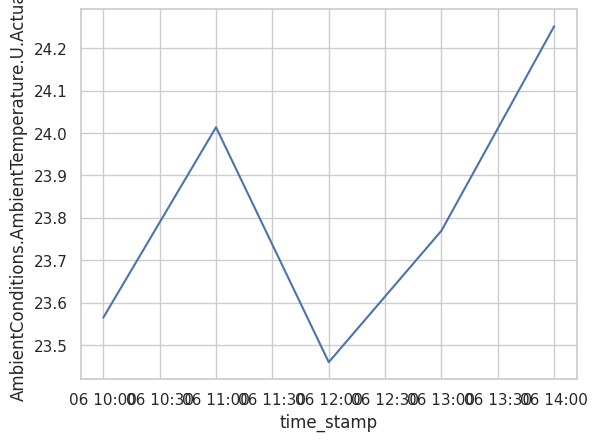

In [80]:
sns.lineplot(data=data2re, x=data2re.index, y='AmbientConditions.AmbientTemperature.U.Actual')

## 2. Filtering and subsetting (10 points)
Filter the data to display only records where **Machine1.Zone1Temperature.C.Actual** is greater than 70 and **Machine1.RawMaterial.Property2** is greater than 150. How many records meet these conditions?


**Machine1.Zone1Temperature.C.Actual**이 70을 초과하고 **Machine1.RawMaterial.Property2**가 150을 초과하는 레코드만 표시하도록 데이터를 필터링하세요. 이 조건을 충족하는 레코드는 몇 개입니까?



In [81]:
data2[(data2['Machine1.Zone1Temperature.C.Actual'] > 70) & (data2['Machine1.RawMaterial.Property2'] > 150)]

,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine1.MotorAmperage.U.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
time_stamp,,,,,,,,,,,,,,,,,,,,,
2019-03-06 10:52:33,17.24,23.53,11.54,200,963.00,247,1241.26,72.0,72.3,48.03,...,0.00,7.93,0.00,5.65,0.00,1.85,0.00,2.89,0.00,11.71
2019-03-06 10:52:34,17.24,23.53,11.54,200,963.00,247,1246.09,72.0,72.3,48.03,...,0.00,7.93,0.00,5.65,0.00,1.85,0.00,2.89,0.00,11.71
2019-03-06 10:52:35,17.24,23.53,11.54,200,963.00,247,1246.29,72.0,72.3,48.16,...,0.00,7.93,0.00,5.65,0.00,1.85,0.00,2.89,0.00,11.71
2019-03-06 10:52:36,17.24,23.53,11.54,200,963.00,247,1247.59,72.0,72.3,48.57,...,0.00,7.93,0.00,5.65,0.00,1.85,0.00,2.89,0.00,11.71
2019-03-06 10:52:37,17.24,23.53,11.54,200,963.00,247,1252.83,72.1,72.4,48.57,...,0.00,7.93,0.00,5.65,0.00,1.85,0.00,2.89,0.00,11.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-06 14:47:16,13.84,24.43,12.22,201,1048.06,252,1263.76,72.0,71.8,73.46,...,7.87,7.93,5.53,5.65,2.07,1.85,3.80,2.89,7.56,11.71
2019-03-06 14:47:17,13.84,24.43,12.22,201,1048.06,252,1255.42,72.0,71.8,73.32,...,7.85,7.93,5.48,5.65,2.01,1.85,3.79,2.89,7.76,11.71
2019-03-06 14:47:18,13.84,24.43,12.22,201,1048.06,252,1257.52,72.0,71.8,73.59,...,7.93,7.93,5.54,5.65,2.06,1.85,3.83,2.89,7.66,11.71


In [82]:
data2[(data2['Machine1.Zone1Temperature.C.Actual'] > 70) & (data2['Machine1.RawMaterial.Property2'] > 150)].shape[0]

14088

14088개이다.

## 3. Data Distribution (10 points)
   Create a histogram to visualize the distribution of **Machine1.RawMaterialFeederParameter.U.Actual**. Comment on the shape of the distribution.

**Machine1.RawMaterialFeederParameter.U.Actual**의 분포를 시각화하는 히스토그램을 생성하세요. 분포의 형태에 대해 설명하세요.

<Axes: xlabel='Machine1.RawMaterialFeederParameter.U.Actual', ylabel='Count'>

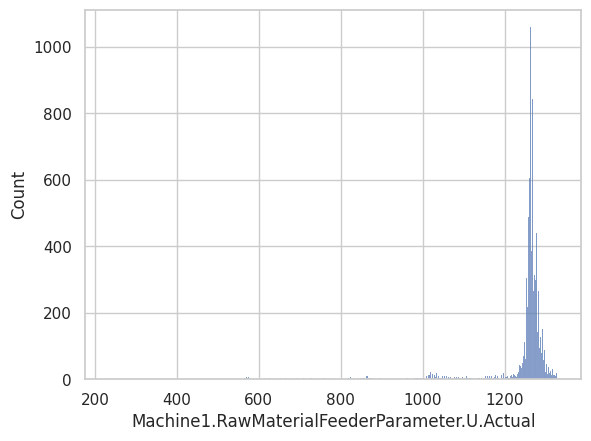

In [83]:
data23 = data2['Machine1.RawMaterialFeederParameter.U.Actual']
sns.histplot(data23)

Machine1.RawMaterialFeederParameter.U.Actual의 값이 1200 이상인 데이터가 대부분의 데이터를 차지한다.

## 4. Rolling Mean (15 points)
   Using the **AmbientConditions.AmbientHumidity.U.Actual** column, compute a 10-minute rolling mean. Plot the rolling mean alongside the original values to observe fluctuations over time.



**AmbientConditions.AmbientHumidity.U.Actual** 열을 사용하여 10분 이동 평균을 계산하세요. 원래 값과 이동 평균을 함께 플롯하여 시간에 따른 변동을 관찰하세요.



In [99]:
data24 = data2['AmbientConditions.AmbientHumidity.U.Actual']
rolling_mean = data24.rolling(window=10*60).mean()

<Axes: xlabel='time_stamp'>

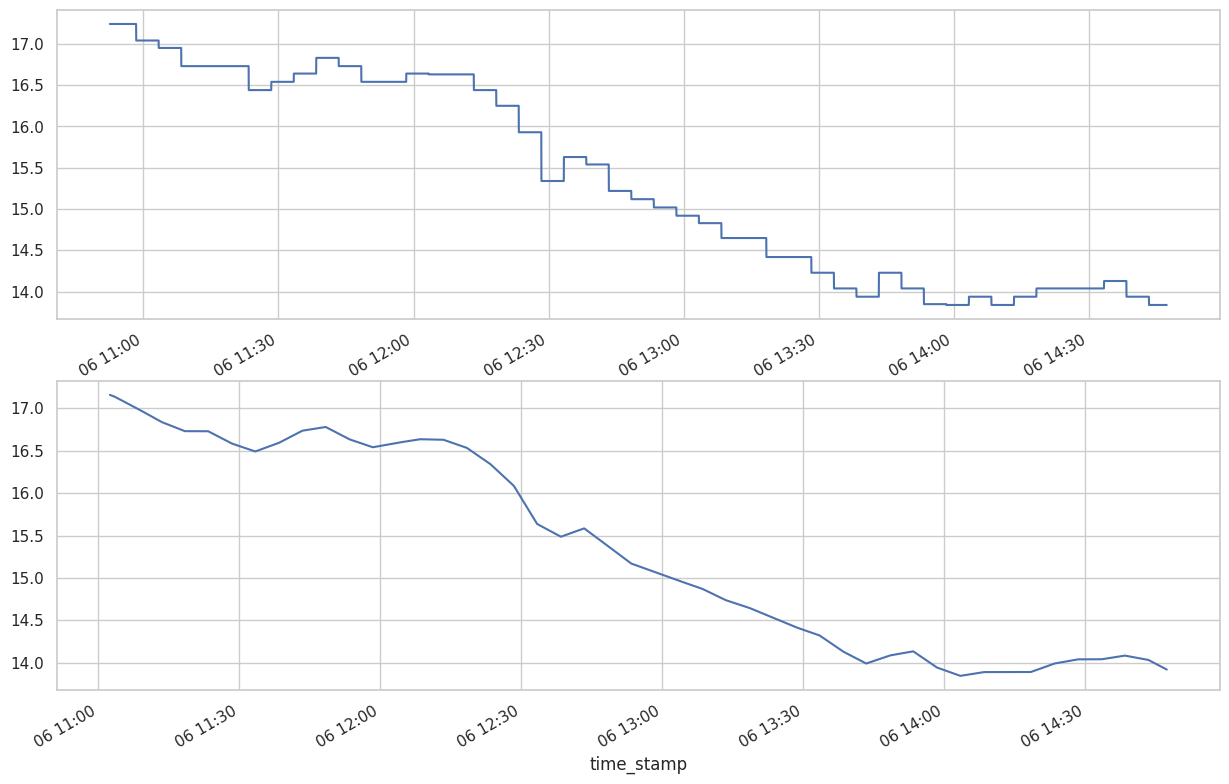

In [101]:
fig, ax = plt.subplots(2, figsize=(15, 10))
data24.plot(ax=ax[0])
rolling_mean.plot(ax=ax[1])

## Bonus Task (10 extra points)

Choose an interesting feature or set of features and create a visualization of your choice. Use your selected visualization method (e.g., histogram, scatter plot, box plot, etc.) to explore the data.

Briefly explain your findings and the reason for your choice.

학생이 흥미로운 특징 또는 특징들의 조합을 선택하여 시각화를 생성해 보세요. 본인이 선택한 시각화 방식(예: 히스토그램, 산점도, 상자 그림 등)을 사용하여 데이터를 탐색하세요.
시각화 결과와 선택 이유에 대해 간단히 설명해 주세요.

In [115]:
corr2 = data2.corr()

In [122]:
data2

,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine1.MotorAmperage.U.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
time_stamp,,,,,,,,,,,,,,,,,,,,,
2019-03-06 10:52:33,17.24,23.53,11.54,200,963.00,247,1241.26,72.0,72.3,48.03,...,0.00,7.93,0.00,5.65,0.00,1.85,0.00,2.89,0.00,11.71
2019-03-06 10:52:34,17.24,23.53,11.54,200,963.00,247,1246.09,72.0,72.3,48.03,...,0.00,7.93,0.00,5.65,0.00,1.85,0.00,2.89,0.00,11.71
2019-03-06 10:52:35,17.24,23.53,11.54,200,963.00,247,1246.29,72.0,72.3,48.16,...,0.00,7.93,0.00,5.65,0.00,1.85,0.00,2.89,0.00,11.71
2019-03-06 10:52:36,17.24,23.53,11.54,200,963.00,247,1247.59,72.0,72.3,48.57,...,0.00,7.93,0.00,5.65,0.00,1.85,0.00,2.89,0.00,11.71
2019-03-06 10:52:37,17.24,23.53,11.54,200,963.00,247,1252.83,72.1,72.4,48.57,...,0.00,7.93,0.00,5.65,0.00,1.85,0.00,2.89,0.00,11.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-06 14:47:16,13.84,24.43,12.22,201,1048.06,252,1263.76,72.0,71.8,73.46,...,7.87,7.93,5.53,5.65,2.07,1.85,3.80,2.89,7.56,11.71
2019-03-06 14:47:17,13.84,24.43,12.22,201,1048.06,252,1255.42,72.0,71.8,73.32,...,7.85,7.93,5.48,5.65,2.01,1.85,3.79,2.89,7.76,11.71
2019-03-06 14:47:18,13.84,24.43,12.22,201,1048.06,252,1257.52,72.0,71.8,73.59,...,7.93,7.93,5.54,5.65,2.06,1.85,3.83,2.89,7.66,11.71


In [109]:
dataH = data2.resample('H').mean()
dataH

<ipython-input-109-10600fadffa3>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dataH = data2.resample('H').mean()


,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine1.MotorAmperage.U.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
time_stamp,,,,,,,,,,,,,,,,,,,,,
2019-03-06 10:00:00,17.196889,23.564489,11.540000,200.000000,963.000000,247.000000,1202.244645,72.106889,72.247222,58.036569,...,0.449000,7.93,0.323556,5.65,0.178289,1.85,2.163556,2.89,1.369311,11.71
2019-03-06 11:00:00,16.692591,24.013974,11.540000,200.000000,963.000000,247.000000,1262.375094,72.037073,72.005449,74.669688,...,7.491862,7.93,5.489210,5.65,1.955539,1.85,3.422664,2.89,7.851380,11.71
2019-03-06 12:00:00,15.819697,23.459236,11.540000,200.000000,1001.131675,247.000000,1249.603907,72.000889,72.007378,71.981511,...,7.924059,7.93,5.718584,5.65,2.071638,1.85,3.469674,2.89,7.885912,11.71
2019-03-06 13:00:00,14.323011,23.769753,12.413634,216.139283,893.403183,251.410342,1242.101770,71.991103,71.991195,66.088154,...,7.843809,7.93,5.570210,5.65,2.069405,1.85,3.669913,2.89,7.451917,11.71
2019-03-06 14:00:00,13.965558,24.252446,11.977350,207.713833,946.676551,250.683562,1216.499748,72.012320,72.020725,70.070510,...,7.832967,7.93,5.553816,5.65,2.030215,1.85,3.807802,2.89,7.674924,11.71


In [110]:
dataD = data2.resample('D').mean()
dataD

,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine1.MotorAmperage.U.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
time_stamp,,,,,,,,,,,,,,,,,,,,,
2019-03-06,15.330759,23.843635,11.851256,205.67632,951.679815,248.868896,1242.764276,72.01333,72.013106,70.333111,...,7.535958,7.93,5.416515,5.65,1.972561,1.85,3.535251,2.89,7.515574,11.71


In [112]:
sns.catplot(data=dataH, x='Machine1.RawMaterial.Property1', y='Machine1.RawMaterial.Property2')

ValueError: scatter requires an x and y column